## Problem 5

The concrete compressive strength is the regression problem. There are a
total of 1030 examples with 8 variables. Randomly split the data in training set
(70% of total points) and testing set (30% of total points)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_excel('Concrete_Data.xls')
display(df.describe())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [3]:
dfNorm = df/df.mean()
dfNorm.X = dfNorm.iloc[:,0:8]
dfNorm.y = dfNorm.iloc[:,8]

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
X=dfNorm.X.values
y=dfNorm.y.values

In [5]:
y

array([2.23313634, 1.72783655, 1.12428723, ..., 0.66158661, 0.91485249,
       0.90461175])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Using backpropagation with 25 units in hidden layers using ReLU function

In [27]:
from sklearn.neural_network import MLPRegressor
nn= MLPRegressor(solver='adam', hidden_layer_sizes=25,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='relu',learning_rate='constant',alpha=0.0001)

In [28]:
nn.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=25, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

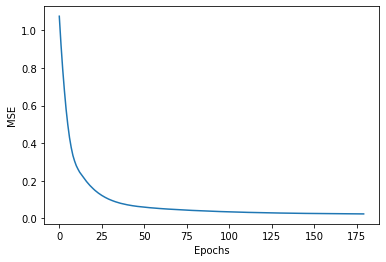

In [29]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn.loss_curve_)
plt.show()

In [30]:
y_train_true=nn.predict(X_train)

#### Train Error

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_true)

0.046432507285064865

#### Test Error

In [32]:
y_test_true=nn.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.05801483392091226

#### Using backpropagation with 50 units in hidden layers with  ReLU function

In [50]:
from sklearn.neural_network import MLPRegressor
nn1= MLPRegressor(solver='adam', hidden_layer_sizes=50,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='relu',learning_rate='constant',alpha=0.000001)

In [51]:
nn1.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

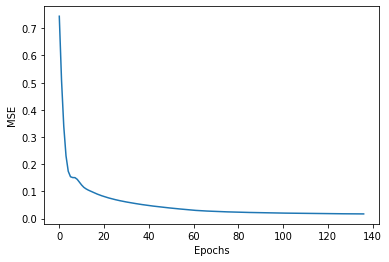

In [52]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn1.loss_curve_)
plt.show()

In [53]:
y_train_true=nn1.predict(X_train)
y_test_true=nn1.predict(X_test)

#### Train error

In [54]:
mean_squared_error(y_train, y_train_true)

0.03456527750974527

#### Test Error

In [55]:
mean_squared_error(y_test_true, y_test)

0.04230433133209754

#### Using backpropagation with 75 units in hidden layers using ReLU

In [56]:
nn2= MLPRegressor(solver='adam', hidden_layer_sizes=75,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='relu',learning_rate='constant',alpha=0.00008)

In [57]:
nn2.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=75, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

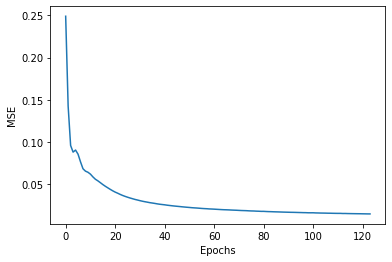

In [58]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn2.loss_curve_)
plt.show()

#### Train Error

In [60]:
y_train_true=nn2.predict(X_train)
mean_squared_error(y_train,y_train_true)

0.02952647220201347

#### Test Error

In [61]:
y_test_true=nn2.predict(X_test)
mean_squared_error(y_test,y_test_true)

0.03882968624375911

#### Backpropapagation with single layer 25 units and tanh activation function

In [68]:
nn4= MLPRegressor(solver='adam', hidden_layer_sizes=25,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='tanh',learning_rate='constant',alpha=0.000008)

In [69]:
nn4.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=8e-06, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=25, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

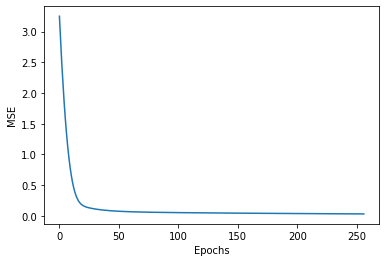

In [70]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn4.loss_curve_)
plt.show()


#### Train Error

In [71]:
y_train_true=nn4.predict(X_train)
mean_squared_error(y_train, y_train_true)

0.061775688959820295

#### Test Error

In [72]:
y_test_true=nn4.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.06978726982315649

#### backprop with 50 units in single layer tanh

In [73]:
nn5= MLPRegressor(solver='adam', hidden_layer_sizes=50,
                   max_iter=1000, shuffle=True, random_state=1,
                   activation='tanh',learning_rate='constant',alpha=0.00008)

In [74]:
nn5.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

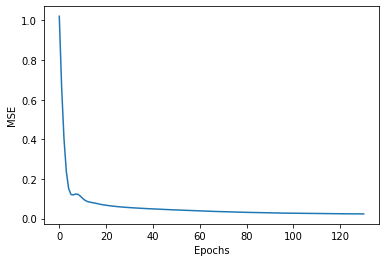

In [75]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn5.loss_curve_)
plt.show()

#### Train Error

In [76]:
y_train_true=nn5.predict(X_train)
mean_squared_error(y_train, y_train_true)

0.04720931772311779

#### Test Error

In [77]:
y_test_true=nn5.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.053519704566449326

#### backprop with 75 units in single layer tanh

In [79]:
nn6= MLPRegressor(solver='adam', hidden_layer_sizes=75,
		                   max_iter=1000, shuffle=True, random_state=1,
		                   activation='tanh',learning_rate='constant',alpha=0.00008)

In [80]:
nn6.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=75, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

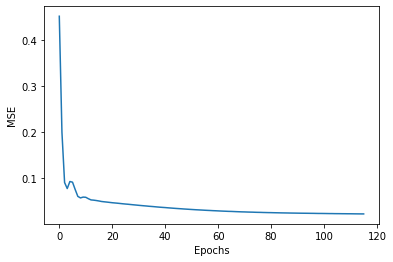

In [81]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn6.loss_curve_)
plt.show()


#### Train Error

In [82]:
y_train_true=nn6.predict(X_train)
mean_squared_error(y_train, y_train_true)

0.046272033268634875

#### Test Error

In [83]:
y_test_true=nn6.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.04999111710759918

### Nueral net using Rprop (Resilient Backpropagation)

In [84]:
def ReLU_function( signal, derivative=False ):
    if derivative:
        return (signal > 0).astype(float)
    else:
        return np.maximum( 0, signal )
    
def tanh_function( signal, derivative=False ):
    signal = np.tanh( signal )
    
    if derivative:
        return 1-np.power(signal,2)
    else:
        return signal
    
def sum_squared_error( outputs, targets, derivative=False ):
    if derivative:
        return outputs - targets 
    else:
        return 0.5 * np.mean(np.sum( np.power(outputs - targets,2), axis = 1 ))
    
    
def add_bias(A):
    return np.hstack(( np.ones((A.shape[0],1)), A ))
#end addBias


In [85]:
import numpy as np

default_settings = {
    # Optional settings
    "weights_low"           : -0.1,     # Lower bound on initial weight range
    "weights_high"          : 0.1,      # Upper bound on initial weight range
    "initial_bias_value"    : 0.01,
}

class NeuralNet:
    def __init__(self, settings ):
        self.__dict__.update( default_settings )
        self.__dict__.update( settings )
        self.n_weights = (self.n_inputs + 1) * self.layers[0][0] + sum( (self.layers[i][0] + 1) * layer[0] for i, layer in enumerate( self.layers[1:] ) )
        self.set_weights( self.generate_weights( self.weights_low, self.weights_high ) )
        for index in range(len(self.layers)):
            self.weights[index][:1,:] = self.initial_bias_value    
    
    def generate_weights(self, low = -0.1, high = 0.1):
        return np.random.uniform(low, high, size=(self.n_weights,))
    
    def set_weights(self, weight_list ):
        start, stop         = 0, 0
        self.weights        = [ ]
        previous_shape      = self.n_inputs + 1
        
        for n_neurons, activation_function in self.layers:
            stop           += previous_shape * n_neurons
            self.weights.append( weight_list[ start:stop ].reshape( previous_shape, n_neurons ))
            
            previous_shape  = n_neurons + 1
            start           = stop
    
    def get_weights(self, ):
        return [w for l in self.weights for w in l.flat]    
    
    def error(self, weight_vector, training_data, training_targets, cost_function ):
        self.set_weights( np.array(weight_vector) )
        out = self.update( training_data )
        return cost_function(out, training_targets )
    
    def measure_quality(self, training_data, training_targets, cost_function ):
        out = self.update( training_data )
        mean_error = cost_function( out, training_targets ) / float(training_data.shape[0])
        range_of_predicted_values = np.max(out) - np.min(out)
        return 1 - (mean_error / range_of_predicted_values)
    
    
    def gradient(self, weight_vector, training_data, training_targets, cost_function ):
        # assign the weight_vector as the network topology
        self.set_weights( np.array(weight_vector) )
        
        input_signals, derivatives  = self.update( training_data, trace=True )                  
        out                         = input_signals[-1]
        cost_derivative             = cost_function(out, training_targets, derivative=True).T
        delta                       = cost_derivative * derivatives[-1]
        
        layer_indexes               = range( len(self.layers) )[::-1]    # reversed
        n_samples                   = float(training_data.shape[0])
        deltas_by_layer             = []
        
        for i in layer_indexes:
            # Loop over the weight layers in reversed order to calculate the deltas
            deltas_by_layer.append(list((np.dot( delta, add_bias(input_signals[i]) )/n_samples).T.flat))
            
            if i!= 0:
                # i!= 0 because we don't want calculate the delta unnecessarily.
                weight_delta        = np.dot( self.weights[ i ][1:,:], delta ) # Skip the bias weight
    
                # Calculate the delta for the subsequent layer
                delta               = weight_delta * derivatives[i-1]
        #end weight adjustment loop
        
        return np.hstack( reversed(deltas_by_layer) )
    # end gradient
    
    
    def check_gradient(self, trainingset, cost_function, epsilon = 1e-4 ):
        check_network_structure( self, cost_function ) # check for special case topology requirements, such as softmax
    
        training_data, training_targets = verify_dataset_shape_and_modify( self, trainingset )
        
        # assign the weight_vector as the network topology
        initial_weights         = np.array(self.get_weights())
        numeric_gradient        = np.zeros( initial_weights.shape )
        perturbed               = np.zeros( initial_weights.shape )
        n_samples               = float(training_data.shape[0])
        
        print ("[gradient check] Running gradient check...")
        
        for i in range( self.n_weights ):
            perturbed[i]        = epsilon
            right_side          = self.error( initial_weights + perturbed, training_data, training_targets, cost_function )
            left_side           = self.error( initial_weights - perturbed, training_data, training_targets, cost_function )
            numeric_gradient[i] = (right_side - left_side) / (2 * epsilon)
            perturbed[i]        = 0
        
        # Reset the weights
        self.set_weights( initial_weights )  
        # Calculate the analytic gradient
        analytic_gradient       = self.gradient( self.get_weights(), training_data, training_targets, cost_function )
        
        # Compare the numeric and the analytic gradient
        ratio  = np.linalg.norm(analytic_gradient - numeric_gradient) / np.linalg.norm(analytic_gradient + numeric_gradient)
        return ratio
    #end
    
    
    def update(self, input_values, trace=False ):
        # This is a forward operation in the network. This is how we 
        # calculate the network output from a set of input signals.
        output          = input_values
        
        if trace: 
            derivatives = [ ]        # collection of the derivatives of the act functions
            outputs     = [ output ] # passed through act. func.
        
        for i, weight_layer in enumerate(self.weights):
            # Loop over the network layers and calculate the output
            signal      = np.dot( output, weight_layer[1:,:] ) + weight_layer[0:1,:] # implicit bias
            output      = self.layers[i][1]( signal )
            
            if trace: 
                outputs.append( output )
                derivatives.append( self.layers[i][1]( signal, derivative = True ).T ) # the derivative used for weight update

        if trace: 
            return outputs, derivatives
        return output
    
    def predict(self, predict_set ):
        return self.update( predict_set )

In [86]:
import numpy as np


def resilient_backpropagation(network, trainingset, training_labels, testset, test_labels, cost_function, ERROR_LIMIT=1e-3, max_iterations = (1000), weight_step_max = 50., weight_step_min = 0., start_step = 0.5, learn_max = 1.2, learn_min = 0.5, print_rate = 1, save_trained_network = True ):  
    
    epo=np.array([])
    err=np.array([])
    ind=0
    print(trainingset.shape,training_labels.shape,testset.shape,test_labels.shape)
    print(training_labels.shape[0],network.layers[-1][0])
    training_labels=training_labels.reshape((training_labels.shape[0],1))
    test_labels=test_labels.reshape((test_labels.shape[0],1))
    assert trainingset[0].shape[0] == network.n_inputs, "ERROR: input size varies from the defined input setting"
    assert training_labels[0].shape[0] == network.layers[-1][0],"ERROR: output size varies from the defined output setting"
    
    training_data              = trainingset
    training_targets           = training_labels
    test_data                  = testset
    test_targets               = test_labels
    
    # Storing the current / previous weight step size
    weight_step                = [ np.full( weight_layer.shape, start_step ) for weight_layer in network.weights ]
    
    # Storing the current / previous weight update
    dW                         = [  np.ones(shape=weight_layer.shape) for weight_layer in network.weights ]
    
    # Storing the previous derivative
    previous_dEdW              = [ 1 ] * len( network.weights )
    
    # Storing the previous error measurement
    prev_error                 = ( )                             # inf
    
    input_signals, derivatives = network.update( training_data, trace=True )
    out                        = input_signals[-1]
    cost_derivative            = cost_function(out, training_targets, derivative=True).T
    delta                      = cost_derivative * derivatives[-1]
    error                      = cost_function(network.update( test_data ), test_targets )
    
    n_samples                  = float(training_data.shape[0])
    layer_indexes              = range( len(network.layers) )[::-1] # reversed
    epoch                      = 0
    
    while error > ERROR_LIMIT and epoch < max_iterations:
        epoch       += 1
        epo=np.append(epo,epoch)
        
        for i in layer_indexes:
            # Loop over the weight layers in reversed order to calculate the deltas
                   
            # Calculate the delta with respect to the weights
            dEdW = (np.dot( delta, add_bias(input_signals[i]) )/n_samples).T
            
            if i != 0:
                """Do not calculate the delta unnecessarily."""
                # Skip the bias weight
                weight_delta = np.dot( network.weights[ i ][1:,:], delta )
    
                # Calculate the delta for the subsequent layer
                delta = weight_delta * derivatives[i-1]
            
            
            # Calculate sign changes and note where they have changed
            diffs            = np.multiply( dEdW, previous_dEdW[i] )
            pos_indexes      = np.where( diffs > 0 )
            neg_indexes      = np.where( diffs < 0 )
            zero_indexes     = np.where( diffs == 0 )
            
            
            # positive
            if np.any(pos_indexes):
                # Calculate the weight step size
                weight_step[i][pos_indexes] = np.minimum( weight_step[i][pos_indexes] * learn_max, weight_step_max )
                
                # Calculate the weight step direction
                dW[i][pos_indexes] = np.multiply( -np.sign( dEdW[pos_indexes] ), weight_step[i][pos_indexes] )
                
                # Apply the weight deltas
                network.weights[i][ pos_indexes ] += dW[i][pos_indexes]
            
            # negative
            if np.any(neg_indexes):
                weight_step[i][neg_indexes] = np.maximum( weight_step[i][neg_indexes] * learn_min, weight_step_min )
                
                if error > prev_error:
                    # iRprop+ version of resilient backpropagation
                    network.weights[i][ neg_indexes ] -= dW[i][neg_indexes] # backtrack
                
                dEdW[ neg_indexes ] = 0
            
            # zeros
            if np.any(zero_indexes):
                dW[i][zero_indexes] = np.multiply( -np.sign( dEdW[zero_indexes] ), weight_step[i][zero_indexes] )
                network.weights[i][ zero_indexes ] += dW[i][zero_indexes]
            
            # Store the previous weight step
            previous_dEdW[i] = dEdW
        #end weight adjustment loop
        
        prev_error                 = error
        err=np.append(err,error)
        
        input_signals, derivatives = network.update( training_data, trace=True )
        out                        = input_signals[-1]
        cost_derivative            = cost_function(out, training_targets, derivative=True).T
        delta                      = cost_derivative * derivatives[-1]
        error                      = cost_function(network.update( training_data ), training_targets )
        
        if epoch%print_rate==0:
            # Show the current training status
            print ("[training] Current error:", error, "\tEpoch:", epoch)

    print ("[training] Finished:")
    print ("[training]   Converged to error bound {0} with error {1}." , ( ERROR_LIMIT, error ))
    print ("[training]   Measured quality train data:"  ,network.measure_quality( training_data, training_targets, cost_function ))
    print ("[training]   Measured quality for test data:"  ,network.measure_quality( test_data, test_targets, cost_function ))
    print ("[training]   Trained for {0} epochs.", epoch)
    
    return epo,err
# end backprop

#### Rprop with 25 neurons in hidden layers using ReLU function

In [88]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (25, ReLU_function), (1, ReLU_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,trainingset,training_labels,testset,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.5675706762035171 	Epoch: 1
[training] Current error: 27.025701726711592 	Epoch: 2
[training] Current error: 0.5675706762035171 	Epoch: 3
[training] Current error: 1.1241108410284957 	Epoch: 4
[training] Current error: 0.5675706762035171 	Epoch: 5
[training] Current error: 0.10211704670661538 	Epoch: 6
[training] Current error: 1.8461093004956401 	Epoch: 7
[training] Current error: 0.10211704670661535 	Epoch: 8
[training] Current error: 0.31114265099675326 	Epoch: 9
[training] Current error: 0.10211704670661538 	Epoch: 10
[training] Current error: 0.09941822298908802 	Epoch: 11
[training] Current error: 0.09941822298908802 	Epoch: 12
[training] Current error: 0.08029244955011591 	Epoch: 13
[training] Current error: 0.0787163215299374 	Epoch: 14
[training] Current error: 0.07661093871106958 	Epoch: 15
[training] Current error: 0.07346705803057671 	Epoch: 16
[training] Current error: 0.06992537060740528 	Epoch: 17
[training

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


 0.05488593406931833 	Epoch: 30
[training] Current error: 0.05400325365928059 	Epoch: 31
[training] Current error: 0.05386808488799565 	Epoch: 32
[training] Current error: 0.05310866657968556 	Epoch: 33
[training] Current error: 0.052568960114770594 	Epoch: 34
[training] Current error: 0.05208802860897181 	Epoch: 35
[training] Current error: 0.05152994574285043 	Epoch: 36
[training] Current error: 0.05091255026013592 	Epoch: 37
[training] Current error: 0.05026320244262452 	Epoch: 38
[training] Current error: 0.04956979941082205 	Epoch: 39
[training] Current error: 0.04884529276422948 	Epoch: 40
[training] Current error: 0.04812202529794446 	Epoch: 41
[training] Current error: 0.04745457046904276 	Epoch: 42
[training] Current error: 0.04692053019243355 	Epoch: 43
[training] Current error: 0.048693484229491955 	Epoch: 44
[training] Current error: 0.04769005069237993 	Epoch: 45
[training] Current error: 0.04655480205840698 	Epoch: 46
[training] Current error: 0.047451620616092836 	Epoch:

[training] Current error: 0.04216775940118182 	Epoch: 214
[training] Current error: 0.04216482897400934 	Epoch: 215
[training] Current error: 0.042161477550856905 	Epoch: 216
[training] Current error: 0.042157693566275016 	Epoch: 217
[training] Current error: 0.04215349511647319 	Epoch: 218
[training] Current error: 0.04215151440486603 	Epoch: 219
[training] Current error: 0.042148681535168674 	Epoch: 220
[training] Current error: 0.04214630150279683 	Epoch: 221
[training] Current error: 0.04214481543694794 	Epoch: 222
[training] Current error: 0.04214366327306199 	Epoch: 223
[training] Current error: 0.04214215137739745 	Epoch: 224
[training] Current error: 0.04214038828348843 	Epoch: 225
[training] Current error: 0.042138908707485 	Epoch: 226
[training] Current error: 0.042137417921561525 	Epoch: 227
[training] Current error: 0.04213597191945796 	Epoch: 228
[training] Current error: 0.04213455178763835 	Epoch: 229
[training] Current error: 0.04213311131234864 	Epoch: 230
[training] C

[training] Current error: 0.04205300975655646 	Epoch: 400
[training] Current error: 0.04205266926799337 	Epoch: 401
[training] Current error: 0.0420526712179535 	Epoch: 402
[training] Current error: 0.04205269033054481 	Epoch: 403
[training] Current error: 0.04205265897546389 	Epoch: 404
[training] Current error: 0.04205265169541922 	Epoch: 405
[training] Current error: 0.04205264507866733 	Epoch: 406
[training] Current error: 0.042052636533893524 	Epoch: 407
[training] Current error: 0.042052626574649685 	Epoch: 408
[training] Current error: 0.04205261520328528 	Epoch: 409
[training] Current error: 0.04205260239245887 	Epoch: 410
[training] Current error: 0.042052588089776424 	Epoch: 411
[training] Current error: 0.042052572354216396 	Epoch: 412
[training] Current error: 0.04205255555899506 	Epoch: 413
[training] Current error: 0.04205253841067714 	Epoch: 414
[training] Current error: 0.042052552851817145 	Epoch: 415
[training] Current error: 0.0420525429633774 	Epoch: 416
[training] 

[training] Current error: 0.04204596296787732 	Epoch: 578
[training] Current error: 0.04204594116350191 	Epoch: 579
[training] Current error: 0.04204591987715746 	Epoch: 580
[training] Current error: 0.04204590135916392 	Epoch: 581
[training] Current error: 0.04204588007757994 	Epoch: 582
[training] Current error: 0.042045862905655006 	Epoch: 583
[training] Current error: 0.04204582498536081 	Epoch: 584
[training] Current error: 0.04204578607428409 	Epoch: 585
[training] Current error: 0.042045752953618 	Epoch: 586
[training] Current error: 0.042045749181555375 	Epoch: 587
[training] Current error: 0.0420457480075863 	Epoch: 588
[training] Current error: 0.04204574386828224 	Epoch: 589
[training] Current error: 0.04204571673700341 	Epoch: 590
[training] Current error: 0.04204570328967716 	Epoch: 591
[training] Current error: 0.042045689747671845 	Epoch: 592
[training] Current error: 0.04204566851230072 	Epoch: 593
[training] Current error: 0.04204564950390891 	Epoch: 594
[training] Cur

[training] Current error: 0.042041589682418626 	Epoch: 728
[training] Current error: 0.0420415791510932 	Epoch: 729
[training] Current error: 0.04204154265169968 	Epoch: 730
[training] Current error: 0.04204153324233055 	Epoch: 731
[training] Current error: 0.042041483931015707 	Epoch: 732
[training] Current error: 0.04204153208294499 	Epoch: 733
[training] Current error: 0.042041483931015707 	Epoch: 734
[training] Current error: 0.042041477046363886 	Epoch: 735
[training] Current error: 0.04204147223830393 	Epoch: 736
[training] Current error: 0.04204142589420806 	Epoch: 737
[training] Current error: 0.042041394698365264 	Epoch: 738
[training] Current error: 0.04204136416825884 	Epoch: 739
[training] Current error: 0.04204134346242256 	Epoch: 740
[training] Current error: 0.04204128152953013 	Epoch: 741
[training] Current error: 0.042041236045535994 	Epoch: 742
[training] Current error: 0.04204116790426287 	Epoch: 743
[training] Current error: 0.042041154319128284 	Epoch: 744
[trainin

[training] Current error: 0.04203779436844348 	Epoch: 869
[training] Current error: 0.042037717924760166 	Epoch: 870
[training] Current error: 0.042037729486830676 	Epoch: 871
[training] Current error: 0.042037727850206305 	Epoch: 872
[training] Current error: 0.04203769118327483 	Epoch: 873
[training] Current error: 0.04203770208638073 	Epoch: 874
[training] Current error: 0.04203767611708209 	Epoch: 875
[training] Current error: 0.0420376787106723 	Epoch: 876
[training] Current error: 0.042037623488128256 	Epoch: 877
[training] Current error: 0.042037632790781175 	Epoch: 878
[training] Current error: 0.04203761996790274 	Epoch: 879
[training] Current error: 0.04203760594823226 	Epoch: 880
[training] Current error: 0.04203758877475531 	Epoch: 881
[training] Current error: 0.04203757388896715 	Epoch: 882
[training] Current error: 0.042037547793178365 	Epoch: 883
[training] Current error: 0.042037516672745814 	Epoch: 884
[training] Current error: 0.04203747960820832 	Epoch: 885
[trainin

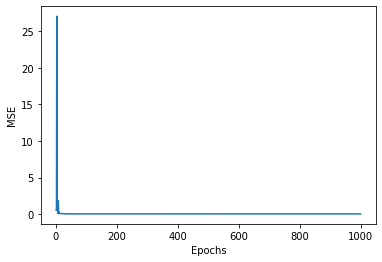

In [89]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(epos,errs)
plt.show()


#### rprop with 50 neurons in hidden layer (ReLU)

In [91]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (50, ReLU_function), (1, ReLU_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,trainingset,training_labels,testset,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.4769150858656137 	Epoch: 1
[training] Current error: 136.63335859368243 	Epoch: 2
[training] Current error: 0.4769150858656136 	Epoch: 3
[training] Current error: 8.522824184331736 	Epoch: 4
[training] Current error: 0.4769150858656136 	Epoch: 5
[training] Current error: 0.36087335766955486 	Epoch: 6
[training] Current error: 0.3608594911732524 	Epoch: 7
[training] Current error: 0.13582496033651292 	Epoch: 8
[training] Current error: 0.13582496033651292 	Epoch: 9
[training] Current error: 0.10122831660455624 	Epoch: 10
[training] Current error: 0.10093467357218208 	Epoch: 11
[training] Current error: 0.08764107390155863 	Epoch: 12
[training] Current error: 0.08286887831884751 	Epoch: 13
[training] Current error: 0.07292919093702101 	Epoch: 14
[training] Current error: 0.06862583577034524 	Epoch: 15
[training] Current error: 0.06416953152452919 	Epoch: 16
[training] Current error: 0.07391436798042607 	Epoch: 17
[training

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[training] Current error: 0.03733684340655976 	Epoch: 50
[training] Current error: 0.036828762736724203 	Epoch: 51
[training] Current error: 0.03647555287509029 	Epoch: 52
[training] Current error: 0.03610614764745172 	Epoch: 53
[training] Current error: 0.035759635886472095 	Epoch: 54
[training] Current error: 0.035411238399205056 	Epoch: 55
[training] Current error: 0.03508394191755026 	Epoch: 56
[training] Current error: 0.034776846978480415 	Epoch: 57
[training] Current error: 0.03450148116071049 	Epoch: 58
[training] Current error: 0.034397572458123006 	Epoch: 59
[training] Current error: 0.03417989707676097 	Epoch: 60
[training] Current error: 0.03401462679217265 	Epoch: 61
[training] Current error: 0.0338719567816467 	Epoch: 62
[training] Current error: 0.03371559869936506 	Epoch: 63
[training] Current error: 0.03363921877067124 	Epoch: 64
[training] Current error: 0.03364260604707807 	Epoch: 65
[training] Current error: 0.033567638213473784 	Epoch: 66
[training] Current error:

[training] Current error: 0.028945914984565287 	Epoch: 222
[training] Current error: 0.028943622087919573 	Epoch: 223
[training] Current error: 0.028943010359319468 	Epoch: 224
[training] Current error: 0.028942280207375423 	Epoch: 225
[training] Current error: 0.02894143420025737 	Epoch: 226
[training] Current error: 0.028941445470123287 	Epoch: 227
[training] Current error: 0.028941609038978005 	Epoch: 228
[training] Current error: 0.028940992310087916 	Epoch: 229
[training] Current error: 0.02894049300632939 	Epoch: 230
[training] Current error: 0.02893984446123118 	Epoch: 231
[training] Current error: 0.028939238527605413 	Epoch: 232
[training] Current error: 0.02893863232875092 	Epoch: 233
[training] Current error: 0.02893801076182492 	Epoch: 234
[training] Current error: 0.02893728081401182 	Epoch: 235
[training] Current error: 0.028936478003799483 	Epoch: 236
[training] Current error: 0.028935826054675134 	Epoch: 237
[training] Current error: 0.028935183934306895 	Epoch: 238
[tr

[training] Current error: 0.028815199655479122 	Epoch: 364
[training] Current error: 0.028814161751391166 	Epoch: 365
[training] Current error: 0.028812818797144913 	Epoch: 366
[training] Current error: 0.028811369618899876 	Epoch: 367
[training] Current error: 0.028809787362919167 	Epoch: 368
[training] Current error: 0.028808121086977178 	Epoch: 369
[training] Current error: 0.02880648139655389 	Epoch: 370
[training] Current error: 0.02880605526357232 	Epoch: 371
[training] Current error: 0.028805347331493297 	Epoch: 372
[training] Current error: 0.0288050281903252 	Epoch: 373
[training] Current error: 0.02880469886411651 	Epoch: 374
[training] Current error: 0.02880427339139098 	Epoch: 375
[training] Current error: 0.028803773389401953 	Epoch: 376
[training] Current error: 0.02880316955397157 	Epoch: 377
[training] Current error: 0.02880250059161681 	Epoch: 378
[training] Current error: 0.02880174698485541 	Epoch: 379
[training] Current error: 0.02880092093313889 	Epoch: 380
[traini

[training] Current error: 0.028575748756914123 	Epoch: 520
[training] Current error: 0.028572259656003903 	Epoch: 521
[training] Current error: 0.0285683252218333 	Epoch: 522
[training] Current error: 0.028564528903904634 	Epoch: 523
[training] Current error: 0.028560166045632954 	Epoch: 524
[training] Current error: 0.02855499867102422 	Epoch: 525
[training] Current error: 0.02855208001799823 	Epoch: 526
[training] Current error: 0.028547953633040943 	Epoch: 527
[training] Current error: 0.028543920027013538 	Epoch: 528
[training] Current error: 0.028539398934182482 	Epoch: 529
[training] Current error: 0.02853385802775231 	Epoch: 530
[training] Current error: 0.028527158741520862 	Epoch: 531
[training] Current error: 0.028519418876269086 	Epoch: 532
[training] Current error: 0.028511118341996648 	Epoch: 533
[training] Current error: 0.028507384517061342 	Epoch: 534
[training] Current error: 0.028500222675334332 	Epoch: 535
[training] Current error: 0.028496224783663822 	Epoch: 536
[t

[training] Current error: 0.028063468162287664 	Epoch: 664
[training] Current error: 0.028065790869434854 	Epoch: 665
[training] Current error: 0.02805772373280761 	Epoch: 666
[training] Current error: 0.02805536541082336 	Epoch: 667
[training] Current error: 0.02805295182846317 	Epoch: 668
[training] Current error: 0.028050257855536706 	Epoch: 669
[training] Current error: 0.028047305318476396 	Epoch: 670
[training] Current error: 0.02804405829232342 	Epoch: 671
[training] Current error: 0.02804147385084263 	Epoch: 672
[training] Current error: 0.02803877862524501 	Epoch: 673
[training] Current error: 0.02803685821564809 	Epoch: 674
[training] Current error: 0.028034881171381608 	Epoch: 675
[training] Current error: 0.02803211843245327 	Epoch: 676
[training] Current error: 0.02802976715761064 	Epoch: 677
[training] Current error: 0.028027213723981124 	Epoch: 678
[training] Current error: 0.028024150501373014 	Epoch: 679
[training] Current error: 0.028021867543373987 	Epoch: 680
[train

[training] Current error: 0.02771375754964031 	Epoch: 807
[training] Current error: 0.027711899435974675 	Epoch: 808
[training] Current error: 0.027709888402015034 	Epoch: 809
[training] Current error: 0.027707891770496918 	Epoch: 810
[training] Current error: 0.027705967188473186 	Epoch: 811
[training] Current error: 0.027704061558879705 	Epoch: 812
[training] Current error: 0.027702871109002013 	Epoch: 813
[training] Current error: 0.027700806629353116 	Epoch: 814
[training] Current error: 0.027699574458576435 	Epoch: 815
[training] Current error: 0.027697631248523293 	Epoch: 816
[training] Current error: 0.027695248317228135 	Epoch: 817
[training] Current error: 0.02769291443654221 	Epoch: 818
[training] Current error: 0.027690517803674614 	Epoch: 819
[training] Current error: 0.027687784466431904 	Epoch: 820
[training] Current error: 0.02768490074936485 	Epoch: 821
[training] Current error: 0.0276838688860643 	Epoch: 822
[training] Current error: 0.027680623202169984 	Epoch: 823
[t

[training] Current error: 0.025652306732963672 	Epoch: 977
[training] Current error: 0.025643288580522137 	Epoch: 978
[training] Current error: 0.025629682163436442 	Epoch: 979
[training] Current error: 0.025617476659965784 	Epoch: 980
[training] Current error: 0.025605937997331317 	Epoch: 981
[training] Current error: 0.0255921910554692 	Epoch: 982
[training] Current error: 0.02558157968988657 	Epoch: 983
[training] Current error: 0.02556819311117695 	Epoch: 984
[training] Current error: 0.02555763906229641 	Epoch: 985
[training] Current error: 0.025539952249553296 	Epoch: 986
[training] Current error: 0.025524217933041115 	Epoch: 987
[training] Current error: 0.02550757461205316 	Epoch: 988
[training] Current error: 0.025485739633739568 	Epoch: 989
[training] Current error: 0.025461289141521726 	Epoch: 990
[training] Current error: 0.025434462724618308 	Epoch: 991
[training] Current error: 0.025405599752500483 	Epoch: 992
[training] Current error: 0.02537406236529823 	Epoch: 993
[tra

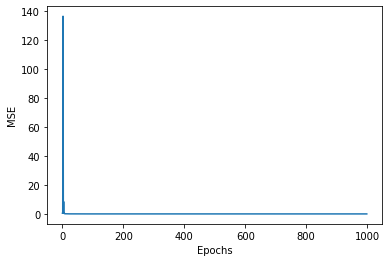

In [92]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 75 neurons in hidden layer (ReLU)

In [94]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (75, ReLU_function), (1, ReLU_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,trainingset,training_labels,testset,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.4281287823952939 	Epoch: 1
[training] Current error: 454.8625281298448 	Epoch: 2
[training] Current error: 0.4281287823952939 	Epoch: 3
[training] Current error: 29.329029438478084 	Epoch: 4
[training] Current error: 0.4281287823952939 	Epoch: 5
[training] Current error: 1.8486984465919796 	Epoch: 6
[training] Current error: 0.4281287823952939 	Epoch: 7
[training] Current error: 0.09268177543273334 	Epoch: 8
[training] Current error: 0.0990066303725669 	Epoch: 9
[training] Current error: 0.18492932546300925 	Epoch: 10
[training] Current error: 0.09291371596518179 	Epoch: 11
[training] Current error: 0.08573073930633411 	Epoch: 12
[training] Current error: 0.07738855766060938 	Epoch: 13
[training] Current error: 0.07403232166047718 	Epoch: 14
[training] Current error: 0.07357494725860003 	Epoch: 15
[training] Current error: 0.07646453452569861 	Epoch: 16
[training] Current error: 0.07065884537269185 	Epoch: 17
[training] 

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.06537081540669926 	Epoch: 23
[training] Current error: 0.06197257111591564 	Epoch: 24
[training] Current error: 0.061618091963914004 	Epoch: 25
[training] Current error: 0.06193807345707768 	Epoch: 26
[training] Current error: 0.05982222434290327 	Epoch: 27
[training] Current error: 0.058834072623334864 	Epoch: 28
[training] Current error: 0.05814464279011827 	Epoch: 29
[training] Current error: 0.057472212292106806 	Epoch: 30
[training] Current error: 0.05677615247116673 	Epoch: 31
[training] Current error: 0.056043473583479456 	Epoch: 32
[training] Current error: 0.055351165192552024 	Epoch: 33
[training] Current error: 0.05485709741804565 	Epoch: 34
[training] Current error: 0.05446550826141436 	Epoch: 35
[training] Current error: 0.053968302090985354 	Epoch: 36
[training] Current error: 0.053340907101033765 	Epoch: 37
[training] Current error: 0.05271253616813461 	Epoch: 38
[training] Current error: 0.05202122980860111 	Epoch: 39
[training] Current error

[training] Current error: 0.03928204056905336 	Epoch: 177
[training] Current error: 0.03924955278180052 	Epoch: 178
[training] Current error: 0.03921628697828212 	Epoch: 179
[training] Current error: 0.03917745221276059 	Epoch: 180
[training] Current error: 0.0391376005557419 	Epoch: 181
[training] Current error: 0.03911951319343026 	Epoch: 182
[training] Current error: 0.039087643201812815 	Epoch: 183
[training] Current error: 0.0390658267187216 	Epoch: 184
[training] Current error: 0.039044733506890396 	Epoch: 185
[training] Current error: 0.039022705206591006 	Epoch: 186
[training] Current error: 0.038999068915598706 	Epoch: 187
[training] Current error: 0.038974675570379334 	Epoch: 188
[training] Current error: 0.038947857257845934 	Epoch: 189
[training] Current error: 0.03891880315480049 	Epoch: 190
[training] Current error: 0.038891353990635896 	Epoch: 191
[training] Current error: 0.03886133066960394 	Epoch: 192
[training] Current error: 0.03882830813686959 	Epoch: 193
[training

[training] Current error: 0.018466032955187006 	Epoch: 323
[training] Current error: 0.01844799902559123 	Epoch: 324
[training] Current error: 0.018429334377702677 	Epoch: 325
[training] Current error: 0.018410715909079386 	Epoch: 326
[training] Current error: 0.018400404590341795 	Epoch: 327
[training] Current error: 0.018393049756405187 	Epoch: 328
[training] Current error: 0.018384685008792315 	Epoch: 329
[training] Current error: 0.01837665849916716 	Epoch: 330
[training] Current error: 0.01836888110868917 	Epoch: 331
[training] Current error: 0.01835956549261789 	Epoch: 332
[training] Current error: 0.018349422825954895 	Epoch: 333
[training] Current error: 0.018340127174482024 	Epoch: 334
[training] Current error: 0.01833043294939427 	Epoch: 335
[training] Current error: 0.018322009559967004 	Epoch: 336
[training] Current error: 0.01831413064894604 	Epoch: 337
[training] Current error: 0.01830654009444768 	Epoch: 338
[training] Current error: 0.01829834062051265 	Epoch: 339
[trai

[training] Current error: 0.01647147502827319 	Epoch: 490
[training] Current error: 0.01646540443907745 	Epoch: 491
[training] Current error: 0.016461513750376362 	Epoch: 492
[training] Current error: 0.016458487332117838 	Epoch: 493
[training] Current error: 0.016455749401492005 	Epoch: 494
[training] Current error: 0.016452547023442874 	Epoch: 495
[training] Current error: 0.016449005686644022 	Epoch: 496
[training] Current error: 0.016445208861552346 	Epoch: 497
[training] Current error: 0.016440914623112632 	Epoch: 498
[training] Current error: 0.016438920193919973 	Epoch: 499
[training] Current error: 0.016435814539798355 	Epoch: 500
[training] Current error: 0.01643373904494248 	Epoch: 501
[training] Current error: 0.016431882393099225 	Epoch: 502
[training] Current error: 0.016430532747238595 	Epoch: 503
[training] Current error: 0.016428905532315952 	Epoch: 504
[training] Current error: 0.01642729175017422 	Epoch: 505
[training] Current error: 0.016425475004036388 	Epoch: 506
[

[training] Current error: 0.015367884504082687 	Epoch: 631
[training] Current error: 0.015362542642131813 	Epoch: 632
[training] Current error: 0.015356373676169172 	Epoch: 633
[training] Current error: 0.015349556167895247 	Epoch: 634
[training] Current error: 0.015342352290989025 	Epoch: 635
[training] Current error: 0.01533402671540714 	Epoch: 636
[training] Current error: 0.015327247841555432 	Epoch: 637
[training] Current error: 0.01532087739703204 	Epoch: 638
[training] Current error: 0.015313852245653323 	Epoch: 639
[training] Current error: 0.015307963596588243 	Epoch: 640
[training] Current error: 0.015300092665405673 	Epoch: 641
[training] Current error: 0.015291720517368936 	Epoch: 642
[training] Current error: 0.015283207065743695 	Epoch: 643
[training] Current error: 0.015274862271839178 	Epoch: 644
[training] Current error: 0.015269440106964844 	Epoch: 645
[training] Current error: 0.015266220943316637 	Epoch: 646
[training] Current error: 0.015259883403370485 	Epoch: 647

[training] Current error: 0.01483843288132877 	Epoch: 781
[training] Current error: 0.01483731940824407 	Epoch: 782
[training] Current error: 0.014836152654260087 	Epoch: 783
[training] Current error: 0.014834885231843366 	Epoch: 784
[training] Current error: 0.0148335193164169 	Epoch: 785
[training] Current error: 0.014831894262224391 	Epoch: 786
[training] Current error: 0.014830062325135132 	Epoch: 787
[training] Current error: 0.014827913776094239 	Epoch: 788
[training] Current error: 0.014825481638190821 	Epoch: 789
[training] Current error: 0.014822680120458374 	Epoch: 790
[training] Current error: 0.014819852002314955 	Epoch: 791
[training] Current error: 0.014817607691178132 	Epoch: 792
[training] Current error: 0.014817548898645937 	Epoch: 793
[training] Current error: 0.01481550937912918 	Epoch: 794
[training] Current error: 0.014814285692180193 	Epoch: 795
[training] Current error: 0.014813060832396351 	Epoch: 796
[training] Current error: 0.014811901865522345 	Epoch: 797
[t

[training] Current error: 0.014612178870286503 	Epoch: 946
[training] Current error: 0.014611000246765472 	Epoch: 947
[training] Current error: 0.014609729415489773 	Epoch: 948
[training] Current error: 0.014608499212250924 	Epoch: 949
[training] Current error: 0.014607611319238892 	Epoch: 950
[training] Current error: 0.014606115519732791 	Epoch: 951
[training] Current error: 0.014604686157934709 	Epoch: 952
[training] Current error: 0.014603291909060926 	Epoch: 953
[training] Current error: 0.014602154228181298 	Epoch: 954
[training] Current error: 0.014601011407299481 	Epoch: 955
[training] Current error: 0.014599998976357633 	Epoch: 956
[training] Current error: 0.014599147513458432 	Epoch: 957
[training] Current error: 0.014598137014267598 	Epoch: 958
[training] Current error: 0.014597209586311428 	Epoch: 959
[training] Current error: 0.014596320105445943 	Epoch: 960
[training] Current error: 0.014595391508843624 	Epoch: 961
[training] Current error: 0.014594487543177862 	Epoch: 9

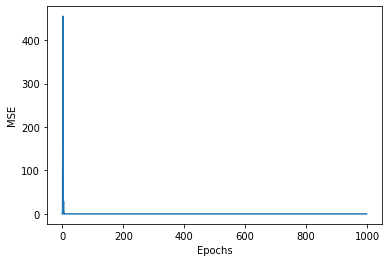

In [95]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 25 neurons in hidden layer using tanh function

In [96]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (25, tanh_function), (1, tanh_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,trainingset,training_labels,testset,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.10969341600535198 	Epoch: 1
[training] Current error: 1.9920966978450145 	Epoch: 2
[training] Current error: 0.10993443718904736 	Epoch: 3
[training] Current error: 0.10993227425355043 	Epoch: 4
[training] Current error: 0.10989239103686323 	Epoch: 5
[training] Current error: 0.09959262457512565 	Epoch: 6
[training] Current error: 0.08942176314571619 	Epoch: 7
[training] Current error: 0.10414104378618996 	Epoch: 8
[training] Current error: 0.5346323169392593 	Epoch: 9
[training] Current error: 0.09886435820584315 	Epoch: 10
[training] Current error: 0.08661865249973019 	Epoch: 11
[training] Current error: 0.36245613061511833 	Epoch: 12
[training] Current error: 0.08562355503138332 	Epoch: 13
[training] Current error: 0.10759538428920178 	Epoch: 14


/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.08490727432251159 	Epoch: 15
[training] Current error: 0.08584073390468121 	Epoch: 16
[training] Current error: 0.08472658328522825 	Epoch: 17
[training] Current error: 0.08295159086795786 	Epoch: 18
[training] Current error: 0.08291112274398112 	Epoch: 19
[training] Current error: 0.08192202505457839 	Epoch: 20
[training] Current error: 0.08120963817415922 	Epoch: 21
[training] Current error: 0.08074266258416773 	Epoch: 22
[training] Current error: 0.07996656727143635 	Epoch: 23
[training] Current error: 0.07927283249796141 	Epoch: 24
[training] Current error: 0.07876340411160482 	Epoch: 25
[training] Current error: 0.07834374873975512 	Epoch: 26
[training] Current error: 0.07791782966776502 	Epoch: 27
[training] Current error: 0.07741295523627538 	Epoch: 28
[training] Current error: 0.07704046615282746 	Epoch: 29
[training] Current error: 0.07660112546899868 	Epoch: 30
[training] Current error: 0.07614670494533585 	Epoch: 31
[training] Current error: 0.075

[training] Current error: 0.0688702783158496 	Epoch: 166
[training] Current error: 0.06885635651694706 	Epoch: 167
[training] Current error: 0.06884385275958771 	Epoch: 168
[training] Current error: 0.06882859756239343 	Epoch: 169
[training] Current error: 0.06881297458106762 	Epoch: 170
[training] Current error: 0.06879727853261357 	Epoch: 171
[training] Current error: 0.06878014940664526 	Epoch: 172
[training] Current error: 0.06876773135919144 	Epoch: 173
[training] Current error: 0.06875706406243656 	Epoch: 174
[training] Current error: 0.06874399499921995 	Epoch: 175
[training] Current error: 0.06873286166761572 	Epoch: 176
[training] Current error: 0.06872588738461602 	Epoch: 177
[training] Current error: 0.06871659794514283 	Epoch: 178
[training] Current error: 0.06870741621557687 	Epoch: 179
[training] Current error: 0.06869850101165909 	Epoch: 180
[training] Current error: 0.06868833537146445 	Epoch: 181
[training] Current error: 0.0686770760023685 	Epoch: 182
[training] Curre

[training] Current error: 0.06786458282004477 	Epoch: 309
[training] Current error: 0.06785715886386795 	Epoch: 310
[training] Current error: 0.06784878957156934 	Epoch: 311
[training] Current error: 0.06783958296789767 	Epoch: 312
[training] Current error: 0.0678293381301796 	Epoch: 313
[training] Current error: 0.06781821582604634 	Epoch: 314
[training] Current error: 0.0678064712215187 	Epoch: 315
[training] Current error: 0.0677946022086873 	Epoch: 316
[training] Current error: 0.06786959443858757 	Epoch: 317
[training] Current error: 0.06787482829280357 	Epoch: 318
[training] Current error: 0.06780540480734755 	Epoch: 319
[training] Current error: 0.06778330662706217 	Epoch: 320
[training] Current error: 0.06782435264714583 	Epoch: 321
[training] Current error: 0.06777701798240453 	Epoch: 322
[training] Current error: 0.067781984294646 	Epoch: 323
[training] Current error: 0.06777100051832388 	Epoch: 324
[training] Current error: 0.06776951895530262 	Epoch: 325
[training] Current 

[training] Current error: 0.06747340796038673 	Epoch: 454
[training] Current error: 0.06747247020610427 	Epoch: 455
[training] Current error: 0.06747142876734026 	Epoch: 456
[training] Current error: 0.06747040164898166 	Epoch: 457
[training] Current error: 0.06746929293301515 	Epoch: 458
[training] Current error: 0.06746850211512925 	Epoch: 459
[training] Current error: 0.06746758273528435 	Epoch: 460
[training] Current error: 0.06746668156973935 	Epoch: 461
[training] Current error: 0.067465704533178 	Epoch: 462
[training] Current error: 0.0674646411166477 	Epoch: 463
[training] Current error: 0.06746353838775106 	Epoch: 464
[training] Current error: 0.06746231929450837 	Epoch: 465
[training] Current error: 0.06746095497709634 	Epoch: 466
[training] Current error: 0.06745941654212442 	Epoch: 467
[training] Current error: 0.06745778120834103 	Epoch: 468
[training] Current error: 0.06745598891425292 	Epoch: 469
[training] Current error: 0.0674539582562903 	Epoch: 470
[training] Current

[training] Current error: 0.0671928320841099 	Epoch: 600
[training] Current error: 0.06719078932767365 	Epoch: 601
[training] Current error: 0.06718904278126653 	Epoch: 602
[training] Current error: 0.06718705990762684 	Epoch: 603
[training] Current error: 0.06718483417933493 	Epoch: 604
[training] Current error: 0.06718297755647319 	Epoch: 605
[training] Current error: 0.06718060450770023 	Epoch: 606
[training] Current error: 0.06717821247541277 	Epoch: 607
[training] Current error: 0.06717568435863523 	Epoch: 608
[training] Current error: 0.06717283355092732 	Epoch: 609
[training] Current error: 0.06716981538467329 	Epoch: 610
[training] Current error: 0.06716681048133985 	Epoch: 611
[training] Current error: 0.06716566742601542 	Epoch: 612
[training] Current error: 0.06716339211208222 	Epoch: 613
[training] Current error: 0.06716130960064805 	Epoch: 614
[training] Current error: 0.06715947684151732 	Epoch: 615
[training] Current error: 0.06715772245663695 	Epoch: 616
[training] Curr

[training] Current error: 0.0669183621505212 	Epoch: 750
[training] Current error: 0.06691712175931301 	Epoch: 751
[training] Current error: 0.06691419654370274 	Epoch: 752
[training] Current error: 0.06691212768067245 	Epoch: 753
[training] Current error: 0.06691014427151001 	Epoch: 754
[training] Current error: 0.06690786378291905 	Epoch: 755
[training] Current error: 0.06690552406046864 	Epoch: 756
[training] Current error: 0.06690377705686895 	Epoch: 757
[training] Current error: 0.06690157105685861 	Epoch: 758
[training] Current error: 0.06689928719568336 	Epoch: 759
[training] Current error: 0.06689729382801744 	Epoch: 760
[training] Current error: 0.06689525148466567 	Epoch: 761
[training] Current error: 0.06689324057509419 	Epoch: 762
[training] Current error: 0.0668912531210971 	Epoch: 763
[training] Current error: 0.06688968333482492 	Epoch: 764
[training] Current error: 0.06688800259302913 	Epoch: 765
[training] Current error: 0.06688618670625128 	Epoch: 766
[training] Curre

[training] Current error: 0.06672437850401043 	Epoch: 892
[training] Current error: 0.06672264029769208 	Epoch: 893
[training] Current error: 0.06672238918890998 	Epoch: 894
[training] Current error: 0.06672080472351578 	Epoch: 895
[training] Current error: 0.06672036835737108 	Epoch: 896
[training] Current error: 0.0667194702596131 	Epoch: 897
[training] Current error: 0.06671846329745067 	Epoch: 898
[training] Current error: 0.06671781911029062 	Epoch: 899
[training] Current error: 0.06671708614081778 	Epoch: 900
[training] Current error: 0.0667161622170209 	Epoch: 901
[training] Current error: 0.06671520175047983 	Epoch: 902
[training] Current error: 0.0667141566409749 	Epoch: 903
[training] Current error: 0.0667129871200511 	Epoch: 904
[training] Current error: 0.06671206443591937 	Epoch: 905
[training] Current error: 0.06671042073356381 	Epoch: 906
[training] Current error: 0.06670906163202509 	Epoch: 907
[training] Current error: 0.06670767209056847 	Epoch: 908
[training] Current

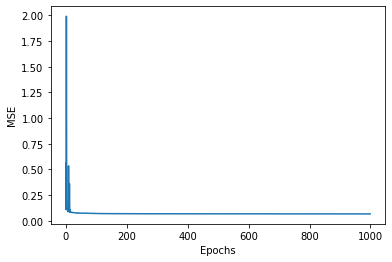

In [97]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 50 neurons in hidden layer using tanh function

In [99]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (50, tanh_function), (1, tanh_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,trainingset,training_labels,testset,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.10993488142196464 	Epoch: 1
[training] Current error: 1.5106447630244657 	Epoch: 2
[training] Current error: 0.10993488498101466 	Epoch: 3
[training] Current error: 0.10993488498100613 	Epoch: 4
[training] Current error: 0.10993488422583048 	Epoch: 5
[training] Current error: 0.09352964095855114 	Epoch: 6
[training] Current error: 1.8195087815067175 	Epoch: 7
[training] Current error: 0.1386843123457704 	Epoch: 8
[training] Current error: 0.10993284364031691 	Epoch: 9
[training] Current error: 0.10990408671783336 	Epoch: 10
[training] Current error: 0.1618856994443389 	Epoch: 11
[training] Current error: 0.10990305939434356 	Epoch: 12
[training] Current error: 0.10754318666444058 	Epoch: 13
[training] Current error: 0.26276783639708157 	Epoch: 14


/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.10729209167577226 	Epoch: 15
[training] Current error: 0.09942316343604714 	Epoch: 16
[training] Current error: 0.13938143287850827 	Epoch: 17
[training] Current error: 0.0995640323151567 	Epoch: 18
[training] Current error: 0.09819992150586834 	Epoch: 19
[training] Current error: 0.10046450647037741 	Epoch: 20
[training] Current error: 0.09786465199202264 	Epoch: 21
[training] Current error: 0.09251117404258236 	Epoch: 22
[training] Current error: 0.0963268084424973 	Epoch: 23
[training] Current error: 0.09064685339131197 	Epoch: 24
[training] Current error: 0.08675400378560351 	Epoch: 25
[training] Current error: 0.08633548540401091 	Epoch: 26
[training] Current error: 0.08361712723206599 	Epoch: 27
[training] Current error: 0.08333400138897386 	Epoch: 28
[training] Current error: 0.08310666073665338 	Epoch: 29
[training] Current error: 0.08249691074107583 	Epoch: 30
[training] Current error: 0.08240173775178769 	Epoch: 31
[training] Current error: 0.08199

[training] Current error: 0.06942880643058044 	Epoch: 161
[training] Current error: 0.06942381749340848 	Epoch: 162
[training] Current error: 0.06940910745443327 	Epoch: 163
[training] Current error: 0.06940406833669653 	Epoch: 164
[training] Current error: 0.0693939784634832 	Epoch: 165
[training] Current error: 0.06938502844965493 	Epoch: 166
[training] Current error: 0.06937382240220039 	Epoch: 167
[training] Current error: 0.06936119831855825 	Epoch: 168
[training] Current error: 0.06934711992181496 	Epoch: 169
[training] Current error: 0.06933382407311933 	Epoch: 170
[training] Current error: 0.06932058570164154 	Epoch: 171
[training] Current error: 0.06930475698506657 	Epoch: 172
[training] Current error: 0.06928711491669476 	Epoch: 173
[training] Current error: 0.0692658174504036 	Epoch: 174
[training] Current error: 0.06924158618179589 	Epoch: 175
[training] Current error: 0.06921425248149855 	Epoch: 176
[training] Current error: 0.06918443420830764 	Epoch: 177
[training] Curre

[training] Current error: 0.0679833479701185 	Epoch: 307
[training] Current error: 0.0679765458395357 	Epoch: 308
[training] Current error: 0.06796915640381108 	Epoch: 309
[training] Current error: 0.06796054164750512 	Epoch: 310
[training] Current error: 0.06795124306329078 	Epoch: 311
[training] Current error: 0.067942296627297 	Epoch: 312
[training] Current error: 0.06793357257915518 	Epoch: 313
[training] Current error: 0.06792426000052733 	Epoch: 314
[training] Current error: 0.06791512789274272 	Epoch: 315
[training] Current error: 0.06790621356473174 	Epoch: 316
[training] Current error: 0.06789587849316235 	Epoch: 317
[training] Current error: 0.0678856424172091 	Epoch: 318
[training] Current error: 0.0678762462035548 	Epoch: 319
[training] Current error: 0.06786835197054727 	Epoch: 320
[training] Current error: 0.0678719843245347 	Epoch: 321
[training] Current error: 0.06787508383958074 	Epoch: 322
[training] Current error: 0.06786441718593465 	Epoch: 323
[training] Current er

[training] Current error: 0.06745850256638859 	Epoch: 460
[training] Current error: 0.0674561383772262 	Epoch: 461
[training] Current error: 0.0674534898812013 	Epoch: 462
[training] Current error: 0.0674506162430269 	Epoch: 463
[training] Current error: 0.06744759117707941 	Epoch: 464
[training] Current error: 0.06744431918834747 	Epoch: 465
[training] Current error: 0.0674408171369863 	Epoch: 466
[training] Current error: 0.06743727757504217 	Epoch: 467
[training] Current error: 0.06743550921398553 	Epoch: 468
[training] Current error: 0.06743473292847146 	Epoch: 469
[training] Current error: 0.06743163307878078 	Epoch: 470
[training] Current error: 0.06743069481402483 	Epoch: 471
[training] Current error: 0.06742902556125195 	Epoch: 472
[training] Current error: 0.06742763082647558 	Epoch: 473
[training] Current error: 0.06742617016421304 	Epoch: 474
[training] Current error: 0.06742465575541451 	Epoch: 475
[training] Current error: 0.06742312220688543 	Epoch: 476
[training] Current

[training] Current error: 0.06719010434799276 	Epoch: 609
[training] Current error: 0.06718817574003845 	Epoch: 610
[training] Current error: 0.06718649545311507 	Epoch: 611
[training] Current error: 0.06718491419566418 	Epoch: 612
[training] Current error: 0.06718329312643846 	Epoch: 613
[training] Current error: 0.06718171167436149 	Epoch: 614
[training] Current error: 0.06718051860256363 	Epoch: 615
[training] Current error: 0.06717870509701832 	Epoch: 616
[training] Current error: 0.06717676501575924 	Epoch: 617
[training] Current error: 0.06717484785911354 	Epoch: 618
[training] Current error: 0.0671726547017171 	Epoch: 619
[training] Current error: 0.06717020864189661 	Epoch: 620
[training] Current error: 0.06716761046801717 	Epoch: 621
[training] Current error: 0.06716500366602368 	Epoch: 622
[training] Current error: 0.06716400231496726 	Epoch: 623
[training] Current error: 0.06716152898416387 	Epoch: 624
[training] Current error: 0.06715983654768962 	Epoch: 625
[training] Curr

[training] Current error: 0.06695996356815448 	Epoch: 765
[training] Current error: 0.06695874366571702 	Epoch: 766
[training] Current error: 0.06695750360229291 	Epoch: 767
[training] Current error: 0.06695617367769331 	Epoch: 768
[training] Current error: 0.06695486272434494 	Epoch: 769
[training] Current error: 0.06695345239148642 	Epoch: 770
[training] Current error: 0.06695220846809828 	Epoch: 771
[training] Current error: 0.06695120583661687 	Epoch: 772
[training] Current error: 0.06694986284673021 	Epoch: 773
[training] Current error: 0.06694855779015566 	Epoch: 774
[training] Current error: 0.06694723646693254 	Epoch: 775
[training] Current error: 0.06694588651781219 	Epoch: 776
[training] Current error: 0.06694461453301681 	Epoch: 777
[training] Current error: 0.06694375963873715 	Epoch: 778
[training] Current error: 0.0669426427006406 	Epoch: 779
[training] Current error: 0.06694159371075631 	Epoch: 780
[training] Current error: 0.06694049958302735 	Epoch: 781
[training] Curr

[training] Current error: 0.0668216791540821 	Epoch: 912
[training] Current error: 0.06682120839128901 	Epoch: 913
[training] Current error: 0.066820649139153 	Epoch: 914
[training] Current error: 0.06682006954549652 	Epoch: 915
[training] Current error: 0.06681942030254881 	Epoch: 916
[training] Current error: 0.06681869449069407 	Epoch: 917
[training] Current error: 0.06681789547004274 	Epoch: 918
[training] Current error: 0.06681702099275198 	Epoch: 919
[training] Current error: 0.06681609943425583 	Epoch: 920
[training] Current error: 0.06681542320228108 	Epoch: 921
[training] Current error: 0.06681433377168948 	Epoch: 922
[training] Current error: 0.06681357779824865 	Epoch: 923
[training] Current error: 0.06681267491651882 	Epoch: 924
[training] Current error: 0.06681161849747441 	Epoch: 925
[training] Current error: 0.0668106320088475 	Epoch: 926
[training] Current error: 0.06680993728654777 	Epoch: 927
[training] Current error: 0.06680930089978478 	Epoch: 928
[training] Current

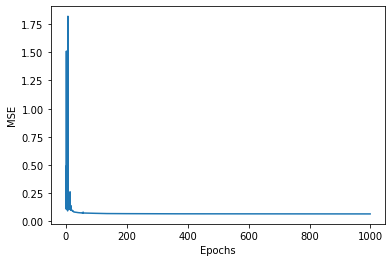

In [100]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 75 neurons in hidden layer using tanh function

In [102]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (75, tanh_function), (1, tanh_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,trainingset,training_labels,testset,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.10993488183333315 	Epoch: 1
[training] Current error: 2.1232333771090293 	Epoch: 2
[training] Current error: 0.10993488498101449 	Epoch: 3
[training] Current error: 0.10996426751792845 	Epoch: 4
[training] Current error: 0.10993488498101725 	Epoch: 5
[training] Current error: 0.1099348849810147 	Epoch: 6
[training] Current error: 0.1099348849810147 	Epoch: 7
[training] Current error: 0.1099348849810147 	Epoch: 8
[training] Current error: 0.1099348849810147 	Epoch: 9
[training] Current error: 0.1099348849810147 	Epoch: 10


/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.1099348849810147 	Epoch: 11
[training] Current error: 0.1099348849810147 	Epoch: 12
[training] Current error: 0.1099348849810147 	Epoch: 13
[training] Current error: 0.1099348849810147 	Epoch: 14
[training] Current error: 0.1099348849810147 	Epoch: 15
[training] Current error: 0.1099348849810147 	Epoch: 16
[training] Current error: 0.1099348849810147 	Epoch: 17
[training] Current error: 0.1099348849810147 	Epoch: 18
[training] Current error: 0.1099348849810147 	Epoch: 19
[training] Current error: 0.1099348849810147 	Epoch: 20
[training] Current error: 0.1099348849810147 	Epoch: 21
[training] Current error: 0.1099348849810147 	Epoch: 22
[training] Current error: 0.1099348849810147 	Epoch: 23
[training] Current error: 0.1099348849810147 	Epoch: 24
[training] Current error: 0.1099348849810147 	Epoch: 25
[training] Current error: 0.1099348849810147 	Epoch: 26
[training] Current error: 0.1099348849810147 	Epoch: 27
[training] Current error: 0.1099348849810147 	Ep

[training] Current error: 0.1099348849810147 	Epoch: 164
[training] Current error: 0.1099348849810147 	Epoch: 165
[training] Current error: 0.1099348849810147 	Epoch: 166
[training] Current error: 0.1099348849810147 	Epoch: 167
[training] Current error: 0.1099348849810147 	Epoch: 168
[training] Current error: 0.1099348849810147 	Epoch: 169
[training] Current error: 0.1099348849810147 	Epoch: 170
[training] Current error: 0.1099348849810147 	Epoch: 171
[training] Current error: 0.1099348849810147 	Epoch: 172
[training] Current error: 0.1099348849810147 	Epoch: 173
[training] Current error: 0.1099348849810147 	Epoch: 174
[training] Current error: 0.1099348849810147 	Epoch: 175
[training] Current error: 0.1099348849810147 	Epoch: 176
[training] Current error: 0.1099348849810147 	Epoch: 177
[training] Current error: 0.1099348849810147 	Epoch: 178
[training] Current error: 0.1099348849810147 	Epoch: 179
[training] Current error: 0.1099348849810147 	Epoch: 180
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 316
[training] Current error: 0.1099348849810147 	Epoch: 317
[training] Current error: 0.1099348849810147 	Epoch: 318
[training] Current error: 0.1099348849810147 	Epoch: 319
[training] Current error: 0.1099348849810147 	Epoch: 320
[training] Current error: 0.1099348849810147 	Epoch: 321
[training] Current error: 0.1099348849810147 	Epoch: 322
[training] Current error: 0.1099348849810147 	Epoch: 323
[training] Current error: 0.1099348849810147 	Epoch: 324
[training] Current error: 0.1099348849810147 	Epoch: 325
[training] Current error: 0.1099348849810147 	Epoch: 326
[training] Current error: 0.1099348849810147 	Epoch: 327
[training] Current error: 0.1099348849810147 	Epoch: 328
[training] Current error: 0.1099348849810147 	Epoch: 329
[training] Current error: 0.1099348849810147 	Epoch: 330
[training] Current error: 0.1099348849810147 	Epoch: 331
[training] Current error: 0.1099348849810147 	Epoch: 332
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 469
[training] Current error: 0.1099348849810147 	Epoch: 470
[training] Current error: 0.1099348849810147 	Epoch: 471
[training] Current error: 0.1099348849810147 	Epoch: 472
[training] Current error: 0.1099348849810147 	Epoch: 473
[training] Current error: 0.1099348849810147 	Epoch: 474
[training] Current error: 0.1099348849810147 	Epoch: 475
[training] Current error: 0.1099348849810147 	Epoch: 476
[training] Current error: 0.1099348849810147 	Epoch: 477
[training] Current error: 0.1099348849810147 	Epoch: 478
[training] Current error: 0.1099348849810147 	Epoch: 479
[training] Current error: 0.1099348849810147 	Epoch: 480
[training] Current error: 0.1099348849810147 	Epoch: 481
[training] Current error: 0.1099348849810147 	Epoch: 482
[training] Current error: 0.1099348849810147 	Epoch: 483
[training] Current error: 0.1099348849810147 	Epoch: 484
[training] Current error: 0.1099348849810147 	Epoch: 485
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 618
[training] Current error: 0.1099348849810147 	Epoch: 619
[training] Current error: 0.1099348849810147 	Epoch: 620
[training] Current error: 0.1099348849810147 	Epoch: 621
[training] Current error: 0.1099348849810147 	Epoch: 622
[training] Current error: 0.1099348849810147 	Epoch: 623
[training] Current error: 0.1099348849810147 	Epoch: 624
[training] Current error: 0.1099348849810147 	Epoch: 625
[training] Current error: 0.1099348849810147 	Epoch: 626
[training] Current error: 0.1099348849810147 	Epoch: 627
[training] Current error: 0.1099348849810147 	Epoch: 628
[training] Current error: 0.1099348849810147 	Epoch: 629
[training] Current error: 0.1099348849810147 	Epoch: 630
[training] Current error: 0.1099348849810147 	Epoch: 631
[training] Current error: 0.1099348849810147 	Epoch: 632
[training] Current error: 0.1099348849810147 	Epoch: 633
[training] Current error: 0.1099348849810147 	Epoch: 634
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 771
[training] Current error: 0.1099348849810147 	Epoch: 772
[training] Current error: 0.1099348849810147 	Epoch: 773
[training] Current error: 0.1099348849810147 	Epoch: 774
[training] Current error: 0.1099348849810147 	Epoch: 775
[training] Current error: 0.1099348849810147 	Epoch: 776
[training] Current error: 0.1099348849810147 	Epoch: 777
[training] Current error: 0.1099348849810147 	Epoch: 778
[training] Current error: 0.1099348849810147 	Epoch: 779
[training] Current error: 0.1099348849810147 	Epoch: 780
[training] Current error: 0.1099348849810147 	Epoch: 781
[training] Current error: 0.1099348849810147 	Epoch: 782
[training] Current error: 0.1099348849810147 	Epoch: 783
[training] Current error: 0.1099348849810147 	Epoch: 784
[training] Current error: 0.1099348849810147 	Epoch: 785
[training] Current error: 0.1099348849810147 	Epoch: 786
[training] Current error: 0.1099348849810147 	Epoch: 787
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 920
[training] Current error: 0.1099348849810147 	Epoch: 921
[training] Current error: 0.1099348849810147 	Epoch: 922
[training] Current error: 0.1099348849810147 	Epoch: 923
[training] Current error: 0.1099348849810147 	Epoch: 924
[training] Current error: 0.1099348849810147 	Epoch: 925
[training] Current error: 0.1099348849810147 	Epoch: 926
[training] Current error: 0.1099348849810147 	Epoch: 927
[training] Current error: 0.1099348849810147 	Epoch: 928
[training] Current error: 0.1099348849810147 	Epoch: 929
[training] Current error: 0.1099348849810147 	Epoch: 930
[training] Current error: 0.1099348849810147 	Epoch: 931
[training] Current error: 0.1099348849810147 	Epoch: 932
[training] Current error: 0.1099348849810147 	Epoch: 933
[training] Current error: 0.1099348849810147 	Epoch: 934
[training] Current error: 0.1099348849810147 	Epoch: 935
[training] Current error: 0.1099348849810147 	Epoch: 936
[training] Current error: 0.109

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


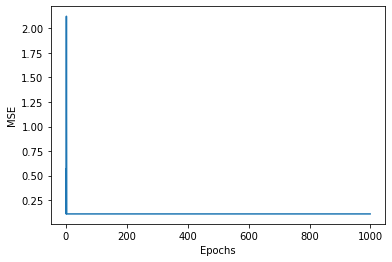

In [103]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()
